In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings('ignore')

# warnings.filterwarnings(action='once') just once 

In [3]:
# from pathlib import Path
from fastai.tabular.all import *

In [4]:
creds = '{"username":"adebanjiadelowo","key":"1deaaeac8d146ed6a75103d8deb98a29"}'

In [5]:
cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.mk_write(creds)
    cred_path.chmod(0o600)

In [6]:
path = URLs.path('bluebook')
path

Path('/root/.fastai/archive/bluebook')

In [7]:
path.exists()

True

In [8]:
from kaggle import api

In [9]:
if not path.exists():
    # path.mkdir()
    api.competition_download_cli('bluebook-for-bulldozers', path=path)
    # file_extract(path/'bluebook-for-bulldozers.zip')
    !unzip /root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip -d /root/.fastai/archive/bluebook

In [10]:
path/'bluebook-for-bulldozers.zip'

Path('/root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip')

In [11]:
path.ls(file_type='text')

(#7) [Path('/root/.fastai/archive/bluebook/Test.csv'),Path('/root/.fastai/archive/bluebook/TrainAndValid.csv'),Path('/root/.fastai/archive/bluebook/Machine_Appendix.csv'),Path('/root/.fastai/archive/bluebook/ValidSolution.csv'),Path('/root/.fastai/archive/bluebook/Valid.csv'),Path('/root/.fastai/archive/bluebook/median_benchmark.csv'),Path('/root/.fastai/archive/bluebook/random_forest_benchmark_test.csv')]

In [12]:
df = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)

In [13]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df['ProductSize'] = df['ProductSize'].astype('category')

In [15]:
sizes = 'Large', 'Large / Medium', 'Medium', 'Small', 'Mini', 'Compact'

In [16]:
df['ProductSize'] = df['ProductSize'].cat.set_categories(sizes, ordered=True)

In [17]:
dep_var = 'SalePrice'

In [18]:
df[dep_var] = np.log(df[dep_var])

In [19]:
df = add_datepart(df, 'saledate')

In [20]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1.163635e+09
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1.080259e+09
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1.077754e+09
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1.305763e+09
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1.248307e+09


In [21]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [22]:
df.tail()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
412693,6333344,9.210340,1919201,21435,149,2.0,2005,NaN,NaN,30NX,...,7,2,67,False,False,False,False,False,False,1.331078e+09
412694,6333345,9.259131,1882122,21436,149,2.0,2005,NaN,NaN,30NX2,...,28,5,28,False,False,False,False,False,False,1.327709e+09
412695,6333347,9.433484,1944213,21435,149,2.0,2005,NaN,NaN,30NX,...,28,5,28,False,False,False,False,False,False,1.327709e+09
412696,6333348,9.210340,1794518,21435,149,2.0,2006,NaN,NaN,30NX,...,7,2,67,False,False,False,False,False,False,1.331078e+09
412697,6333349,9.472705,1944743,21436,149,2.0,2006,NaN,NaN,30NX2,...,28,5,28,False,False,False,False,False,False,1.327709e+09


In [23]:
cont_nn,cat_nn = cont_cat_split(df, max_card=9000, dep_var=dep_var)

In [24]:
df[cat_nn].nunique()

ModelID                    5281
datasource                    6
YearMade                     73
UsageBand                     3
fiModelDesc                5059
fiBaseModel                1961
fiSecondaryDesc             177
fiModelSeries               123
fiModelDescriptor           140
ProductSize                   6
fiProductClassDesc           74
state                        53
ProductGroup                  6
ProductGroupDesc              6
Drive_System                  4
Enclosure                     6
Forks                         2
Pad_Type                      4
Ride_Control                  3
Stick                         2
Transmission                  8
Turbocharged                  2
Blade_Extension               2
Blade_Width                   6
Enclosure_Type                3
Engine_Horsepower             2
Hydraulics                   12
Pushblock                     2
Ripper                        4
Scarifier                     2
Tip_Control                   3
Tire_Siz

In [25]:
'saleElapsed' in cont_nn

True

In [26]:
'saleElapsed' in cat_nn

False

In [27]:
cond = (df.saleYear<2011) | (df.saleMonth<10)

In [28]:
np.all(np.where( cond)[0] == np.array(df.index[(df.saleYear<2011) | (df.saleMonth<10)]))

True

In [29]:
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

In [30]:
splits = (list(train_idx), list(valid_idx))

In [31]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df, procs_nn, cat_nn, cont_nn, splits=splits, y_names=dep_var)

In [32]:
dls = to_nn.dataloaders(1024)

In [33]:
y = to_nn.train.y
y.min(),y.max()

(8.465899, 11.863583)

SuggestedLRs(valley=0.0003311311302240938)

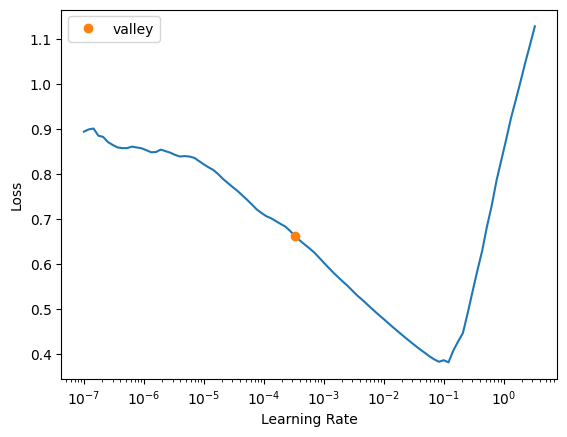

In [34]:
learn = tabular_learner(dls, y_range=(8,12), layers=[500,250], n_out=1, loss_func=F.mse_loss)
learn.lr_find()

In [35]:
learn.fit_one_cycle(4, 1e-2)

epoch,train_loss,valid_loss,time
0,0.056492,0.060263,00:44
1,0.048302,0.054007,00:45
2,0.039518,0.048394,00:41
3,0.034472,0.048306,00:43


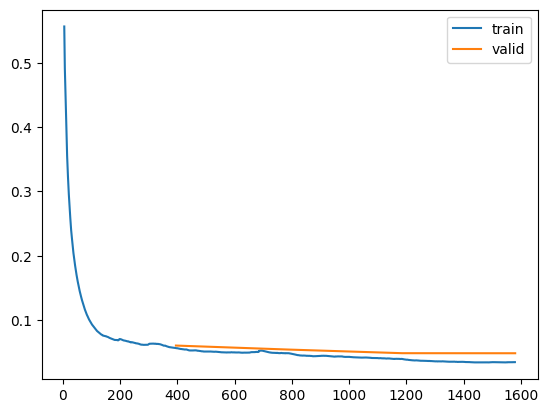

In [36]:
learn.recorder.plot_loss()

In [37]:
# dir(learn.recorder)

In [38]:
# learn.fit_one_cycle(15, 1e-2)

In [39]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [40]:
preds,targs = learn.get_preds()
r_mse(preds,targs)

0.219786

In [41]:
learn.save('nntabular')

Path('models/nntabular.pth')

In [42]:
tabular_learner??

Signature:
tabular_learner(
    dls: 'TabularDataLoaders',
    layers: 'list' = None,
    emb_szs: 'list' = None,
    config: 'dict' = None,
    n_out: 'int' = None,
    y_range: 'Tuple' = None,
    *,
    loss_func: 'callable | None' = None,
    opt_func: 'Optimizer | OptimWrapper' = <function Adam at 0x7d6a3c601240>,
    lr: 'float | slice' = 0.001,
    splitter: 'callable' = <function trainable_params at 0x7d6a400eb400>,
    cbs: 'Callback | MutableSequence | None' = None,
    metrics: 'callable | MutableSequence | None' = None,
    path: 'str | Path | None' = None,
    model_dir: 'str | Path' = 'models',
    wd: 'float | int | None' = None,
    wd_bn_bias: 'bool' = False,
    train_bn: 'bool' = True,
    moms: 'tuple' = (0.95, 0.85, 0.95),
    default_cbs: 'bool' = True,
)
Source:   
@delegates(Learner.__init__)
def tabular_learner(
        dls:TabularDataLoaders,
        layers:list=None, # Size of the layers generated by `LinBnDrop`
        emb_szs:list=None, # Tuples of `n_uniqu

In [43]:
TabularModel??

Init signature:
TabularModel(
    emb_szs: 'list',
    n_cont: 'int',
    out_sz: 'int',
    layers: 'list',
    ps: 'float | MutableSequence' = None,
    embed_p: 'float' = 0.0,
    y_range=None,
    use_bn: 'bool' = True,
    bn_final: 'bool' = False,
    bn_cont: 'bool' = True,
    act_cls=ReLU(inplace=True),
    lin_first: 'bool' = True,
)
Source:        
class TabularModel(Module):
    "Basic model for tabular data."
    def __init__(self, 
        emb_szs:list, # Sequence of (num_embeddings, embedding_dim) for each categorical variable
        n_cont:int, # Number of continuous variables
        out_sz:int, # Number of outputs for final `LinBnDrop` layer
        layers:list, # Sequence of ints used to specify the input and output size of each `LinBnDrop` layer
        ps:float|MutableSequence=None, # Sequence of dropout probabilities for `LinBnDrop`
        embed_p:float=0., # Dropout probability for `Embedding` layer
        y_range=None, # Low and high for `SigmoidRange` activa

In [44]:
#xs_filt2 = xs_filt.drop('fiModelDescriptor', axis=1)
#valid_xs_time2 = valid_xs_time.drop('fiModelDescriptor', axis=1)
#m2 = rf(xs_filt2, y_filt)
#m_rmse(m, xs_filt2, y_filt), m_rmse(m2, valid_xs_time2, valid_y)

In [45]:
#cat_nn.remove('fiModelDescriptor')